You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df=pd.read_csv('property_prices.txt')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

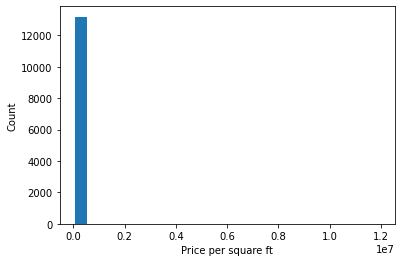

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [5]:
#Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

# Using log scale can make visualization little better

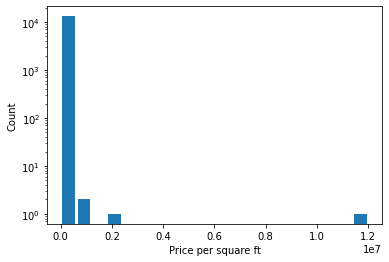

In [6]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')               # for clearly understand, we take log

# (1) Treat outliers using percentile first

In [7]:
lower_limit=df.price_per_sqft.quantile(0.001)
lower_limit

1366.184

In [8]:
upper_limit=df.price_per_sqft.quantile(0.999)
upper_limit

50959.36200000098

In [9]:
outliers=df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
7012,other,1 BHK,650.0,1.0,500.0,1,76923
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [10]:
# Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [11]:
df2=df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [12]:
df2.shape

(13172, 7)

In [13]:
df.shape

(13200, 7)

In [14]:
df.shape[0]-df2.shape[0]
# number of outliers remove

28

# (3) remove outliers using 4 standard deviation

In [15]:
max_limit=df2.price_per_sqft.mean()+ 4*df2.price_per_sqft.std()
max_limit

23227.73653589432

In [16]:
min_limit=df2.price_per_sqft.mean()-4*df2.price_per_sqft.std()
min_limit

-9900.429065502582

In [17]:
outliers2=df2[(df.price_per_sqft>max_limit)|(df2.price_per_sqft<min_limit)]
outliers2.sample(10)

C:\Users\akpat\AppData\Local\Temp\ipykernel_15700\855068647.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers2=df2[(df.price_per_sqft>max_limit)|(df2.price_per_sqft<min_limit)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
7262,other,4 Bedroom,1200.0,5.0,325.0,4,27083
9636,other,4 Bedroom,2100.0,3.0,1000.0,4,47619
2618,Malleshwaram,7 Bedroom,3000.0,4.0,900.0,7,30000
10327,Cunningham Road,4 Bedroom,7500.0,6.0,1800.0,4,24000
3935,other,4 Bedroom,2360.0,4.0,600.0,4,25423
4993,other,6 Bedroom,825.0,6.0,400.0,6,48484
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166


In [18]:
df3=df2[(df.price_per_sqft<max_limit)&(df2.price_per_sqft>min_limit)]
df3

C:\Users\akpat\AppData\Local\Temp\ipykernel_15700\1093680849.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[(df.price_per_sqft<max_limit)&(df2.price_per_sqft>min_limit)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [19]:
df2.shape[0]-df3.shape[0]
#number of outlier removes

125

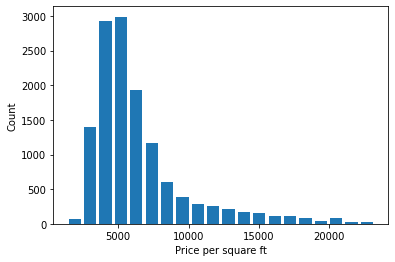

In [20]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

# (3) Now remove outliers using z score. Use z score of 4 as thresold

In [21]:
df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/(df2.price_per_sqft.std())
df2.sample(10)

C:\Users\akpat\AppData\Local\Temp\ipykernel_15700\1794668658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/(df2.price_per_sqft.std())


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9623,JP Nagar,4 Bedroom,1500.0,2.0,87.00,4,5800,-0.208561
4026,other,2 BHK,1512.0,1.0,65.01,2,4299,-0.571032
2676,Nagarbhavi,2 BHK,1055.0,2.0,55.00,2,5213,-0.350313
2451,Kanakpura Road,3 BHK,1660.0,3.0,75.00,3,4518,-0.518146
200,Whitefield,2 BHK,1225.0,2.0,47.60,2,3885,-0.671007
2267,other,2 BHK,1210.0,2.0,40.00,2,3305,-0.811069
234,Vijayanagar,3 BHK,1933.0,3.0,129.00,3,6673,0.002257
3817,Yelenahalli,2 BHK,1159.0,2.0,60.00,2,5176,-0.359248
3400,other,2 Bedroom,1200.0,2.0,79.00,2,6583,-0.019477
4993,other,6 Bedroom,825.0,6.0,400.00,6,48484,10.099043


In [22]:
outliers_z=df2[(df2.zscore>4)|(df2.zscore<-4)]
outliers_z.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
13081,other,6 Bedroom,8000.00,6.0,2800.0,6,35000,6.842841
9099,Whitefield,3 BHK,1496.00,2.0,718.0,3,47994,9.980715
12640,other,3 BHK,2777.29,5.0,649.0,3,23368,4.033872
3816,Domlur,6 BHK,2400.00,4.0,600.0,6,25000,4.427977
13013,other,4 Bedroom,1200.00,5.0,350.0,4,29166,5.434010
5909,other,5 Bedroom,1240.00,5.0,300.0,5,24193,4.233098
12609,other,6 Bedroom,2295.00,3.0,650.0,6,28322,5.230195
13094,other,4 Bedroom,1200.00,5.0,325.0,4,27083,4.930994
7901,other,4 Bedroom,2400.00,4.0,600.0,4,25000,4.427977
9853,Indira Nagar,5 Bedroom,2400.00,5.0,700.0,5,29166,5.434010


In [23]:
df4=df2[(df2.zscore<4)&(df2.zscore>-4)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


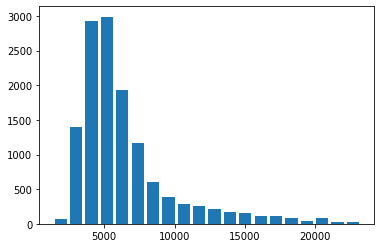

In [27]:
plt.hist(df4.price_per_sqft, bins=20, rwidth=0.8)
plt.show()

<AxesSubplot:xlabel='price_per_sqft'>

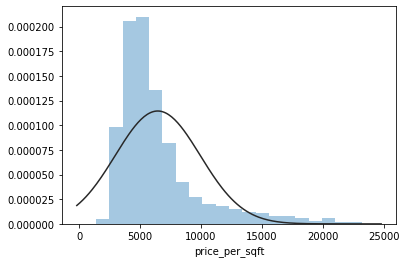

In [34]:
sns.distplot(df4.price_per_sqft, bins=20, kde=False, fit=norm)